In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
dt = pd.read_csv("iris.csv")
dt

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dt.shape

(149, 5)

In [6]:
# The total records were down to 149 as the headers were record itself.
# AS we dont wanna set the record as the header,we have to set (header = None)
dt = pd.read_csv("iris.csv",header = None)
dt

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
dt.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [11]:
dt.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dt.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dt.species.unique()  # So we have 3 different species of iris flower.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
dt.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
dt.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<Axes: >

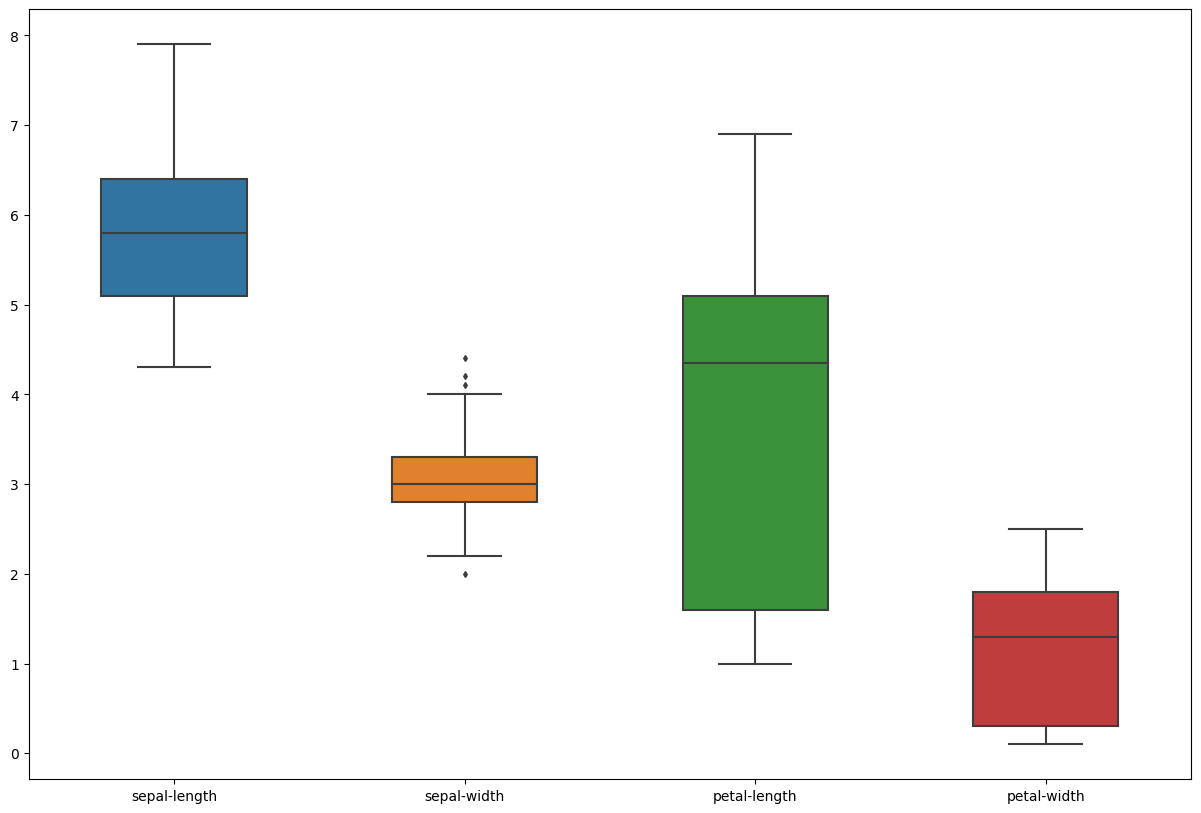

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dt, width= 0.5, ax=ax, fliersize=3)

<Axes: xlabel='species', ylabel='petal-width'>

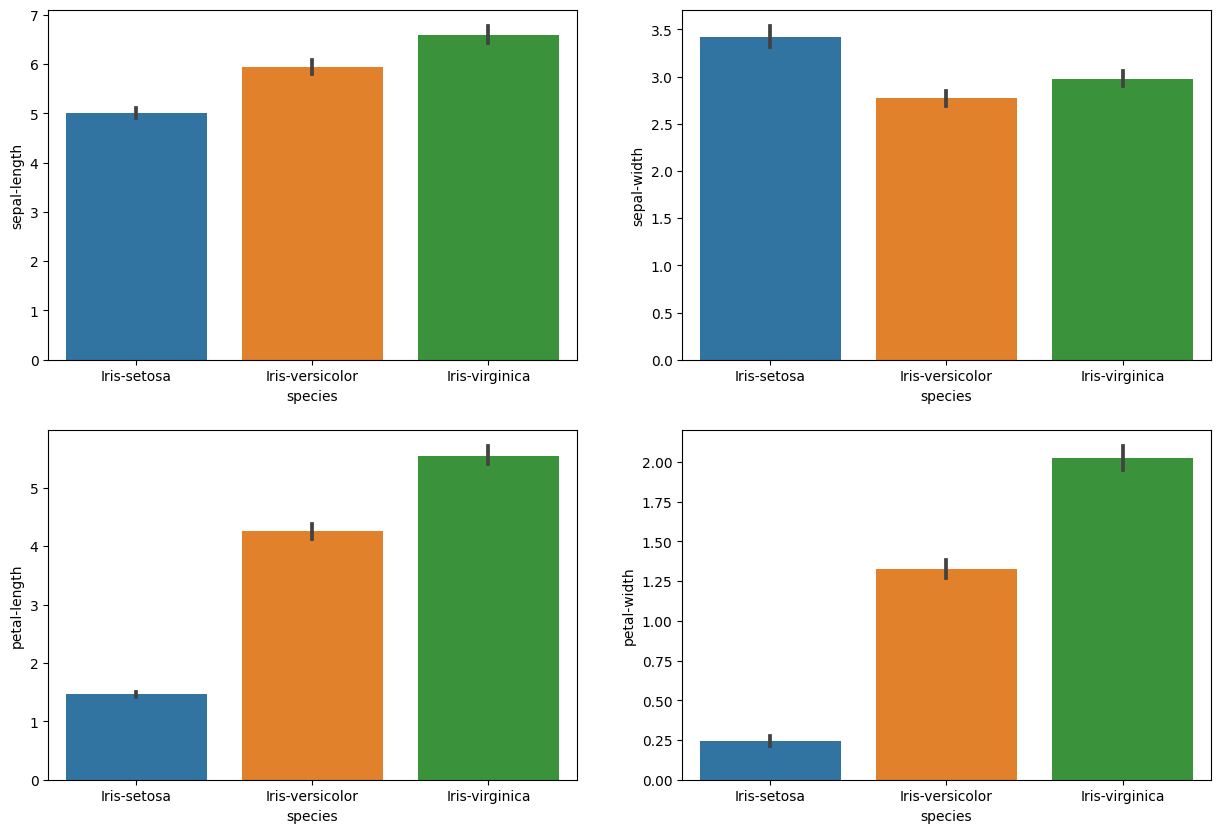

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'species', y = 'sepal-length', data=dt)
plt.subplot(2,2,2)
sns.barplot(x = 'species', y = 'sepal-width', data=dt)
plt.subplot(2,2,3)
sns.barplot(x = 'species', y = 'petal-length', data=dt)
plt.subplot(2,2,4)
sns.barplot(x = 'species', y = 'petal-width', data=dt)


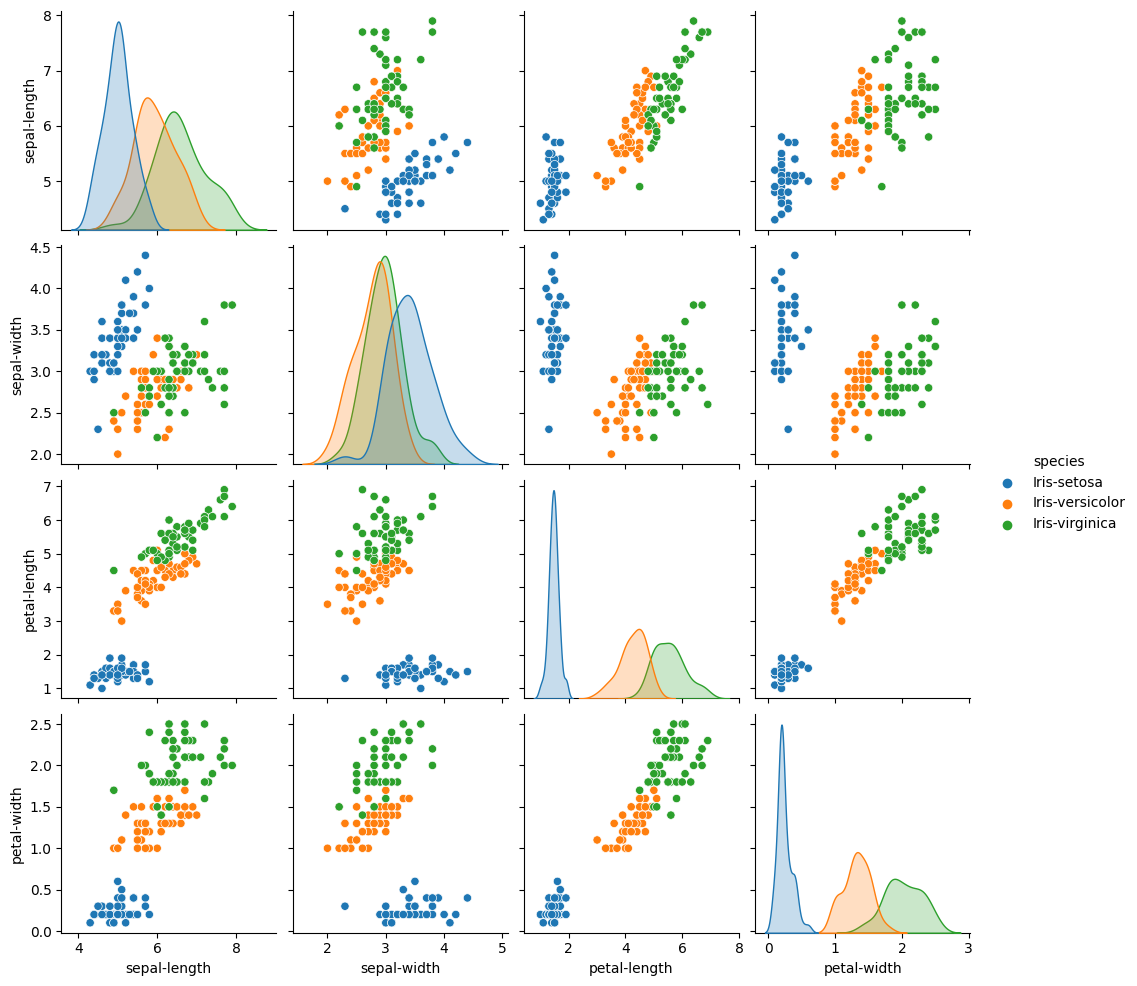

In [20]:
#Pairplot
sns.pairplot(dt,hue='species')

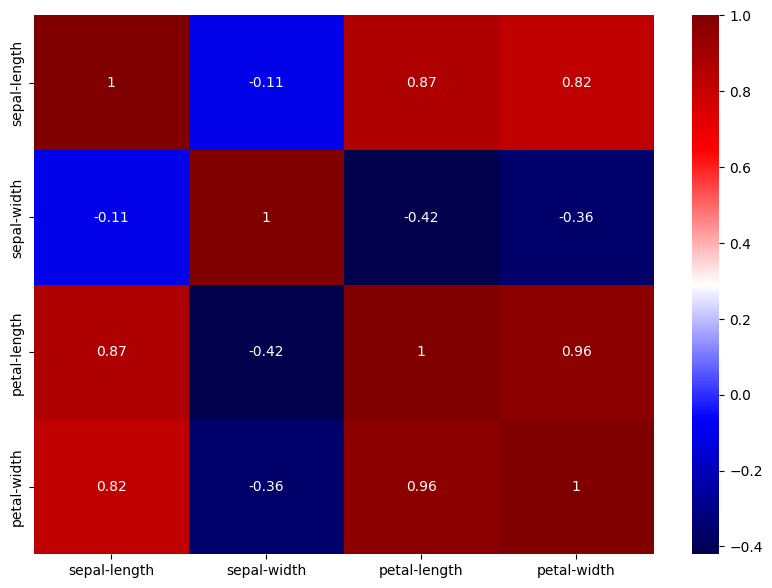

In [22]:
#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(dt.corr(numeric_only=True),annot=True,cmap="seismic")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # It is used to normalize labels.


In [26]:
dt['species'] = le.fit_transform(dt['species'])  #fit_transform: Fit label encoder and return encoded labels.
dt.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X_train = dt.drop('species', axis=1)
Y_train = dt['species']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3,random_state=100)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc=dtc.fit(x_train, y_train)


In [32]:
from sklearn.metrics import accuracy_score
act = accuracy_score(y_train,dtc.predict(x_train))
print('Training Accuracy is: ',(act*100))

Training Accuracy is:  100.0


In [33]:
act = accuracy_score(y_test,dtc.predict(x_test))
print('Test Accuracy is: ',(act*100))


Test Accuracy is:  95.55555555555556


[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

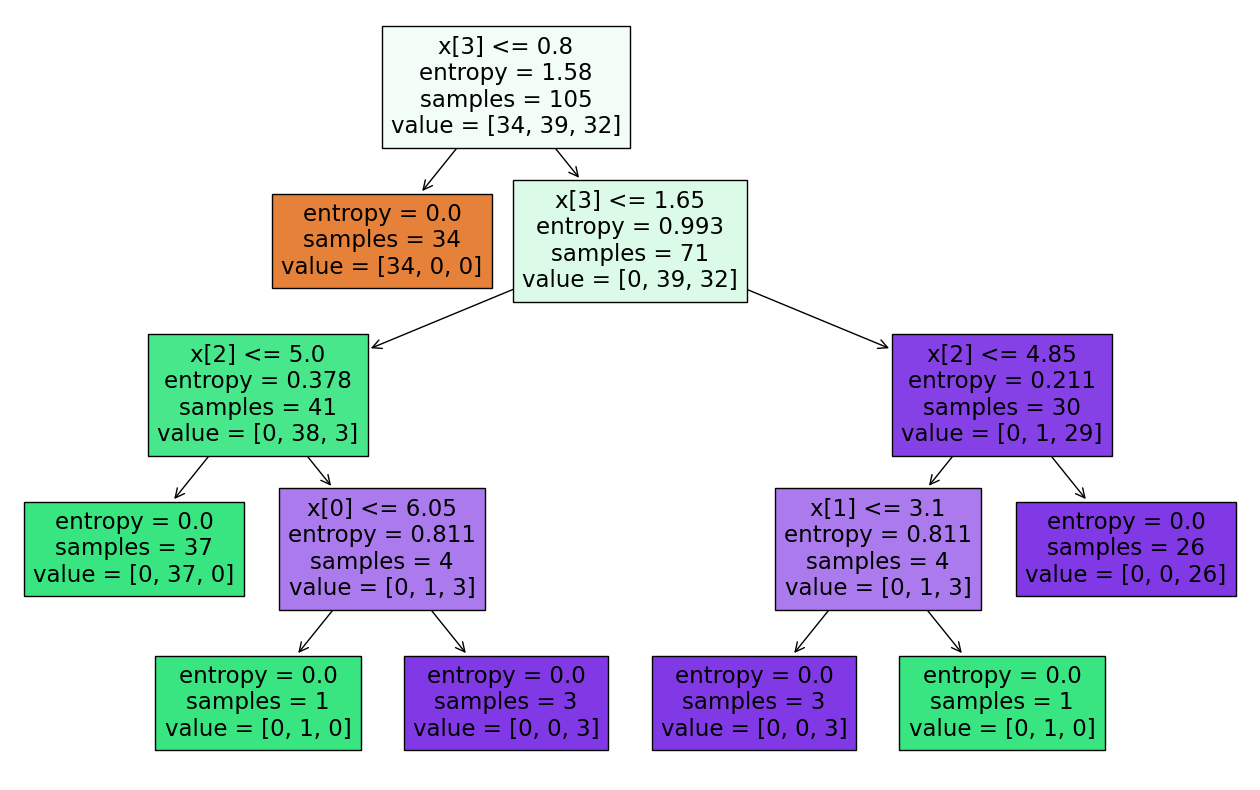

In [34]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtc,filled=True)